In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
df=pd.read_csv('HR_Data.csv')

In [3]:
df

enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience                 NaN        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20          NaN             NaN            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5          NaN             NaN        never   
3      Business Degree         <1          NaN         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14          NaN             NaN            1   
19154             STEM         14          NaN             NaN            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156              NaN         <1      500-999         Pvt Ltd            2   
19157              NaN          2          NaN             NaN            1   

       training_hours  target  
0                  36     1.0  
1                  47     0.0  
2                  83     0.0  
3                  52     1.0  
4                   8     0.0  
...               ...     ...  
19153              42     1.0  
19154              52     1.0  
19155              44     0.0  
19156              97     0.0  
19157             127     0.0  

[19158 rows x 14 columns]

In [5]:
df.shape


(19158, 14)

In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
df.isnull().sum().sum()

20733

<AxesSubplot:>

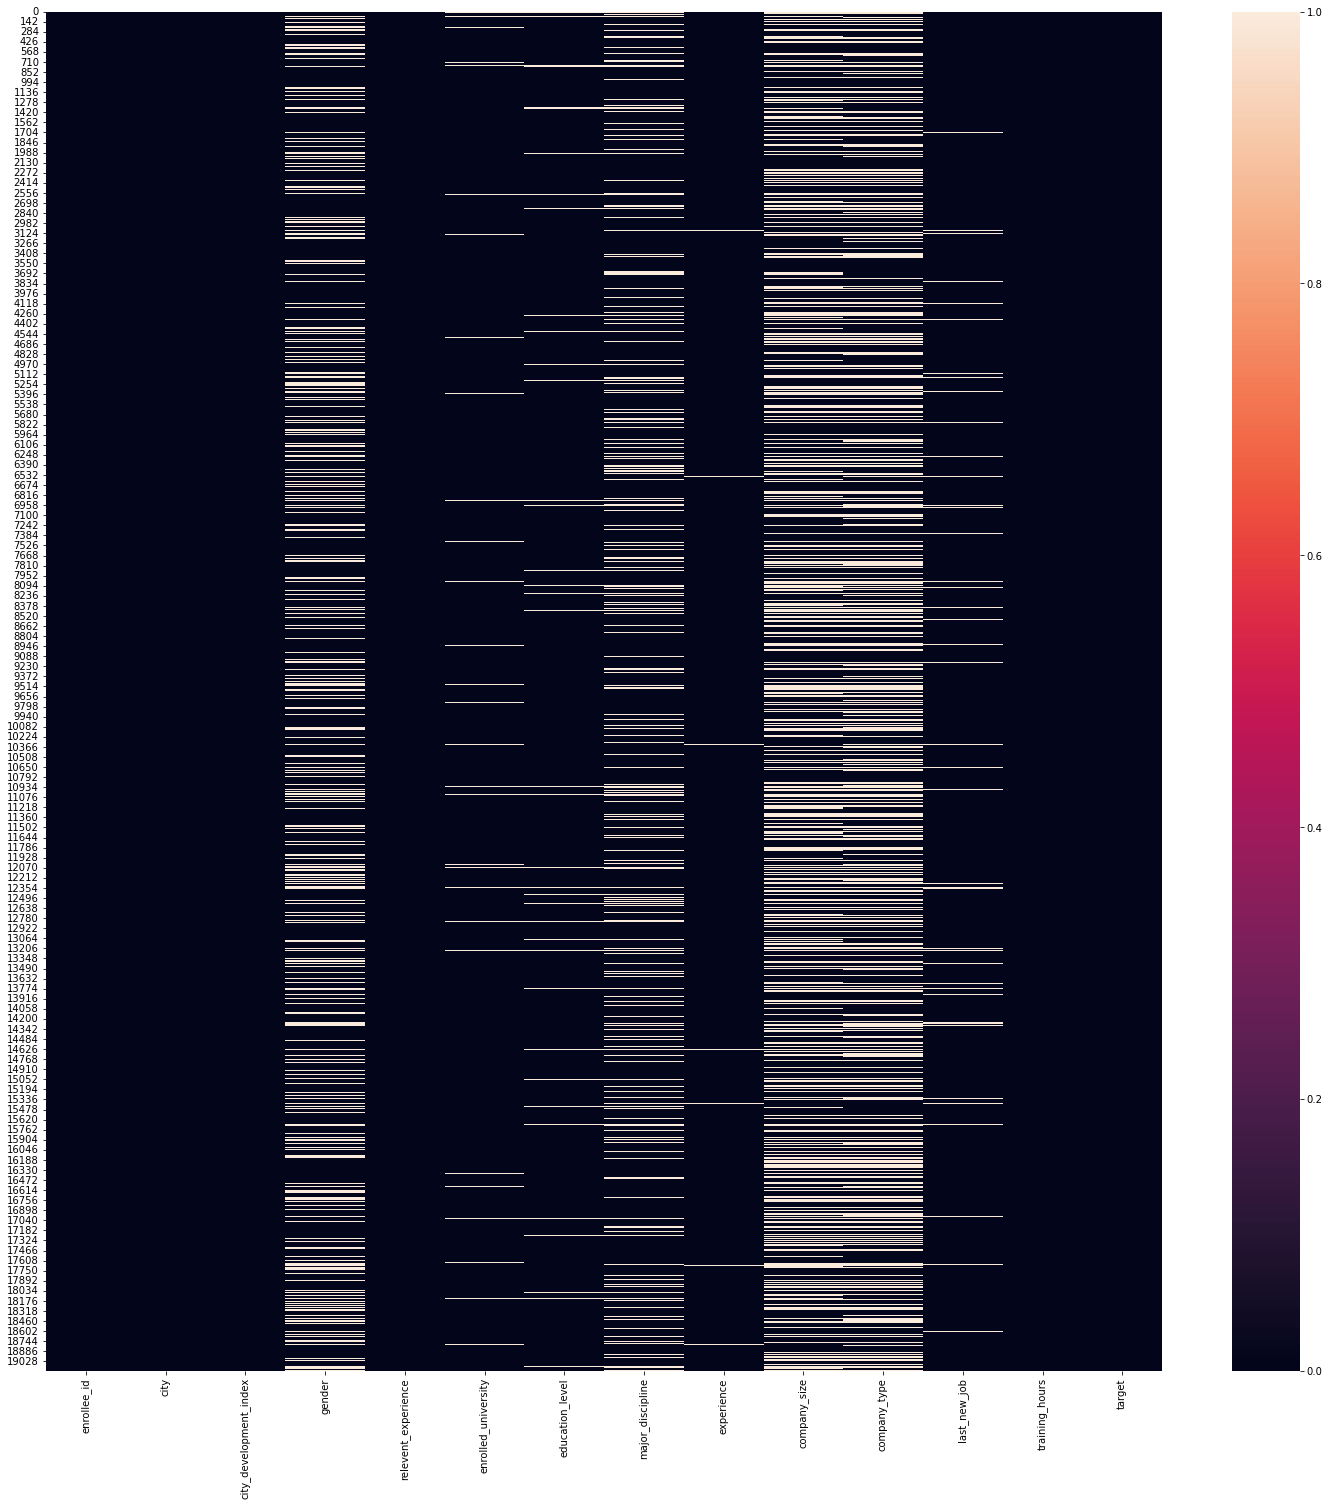

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [9]:
null_var=df.isnull().sum()/df.shape[0]*100

In [10]:
null_var

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [15]:
df_column_drop=null_var[null_var>13].keys()

In [16]:
df_column_drop

Index(['gender', 'major_discipline', 'company_size', 'company_type'], dtype='object')

In [17]:
df3=df.drop(columns=df_column_drop)

In [57]:
df3.shape

(19158, 10)

<AxesSubplot:>

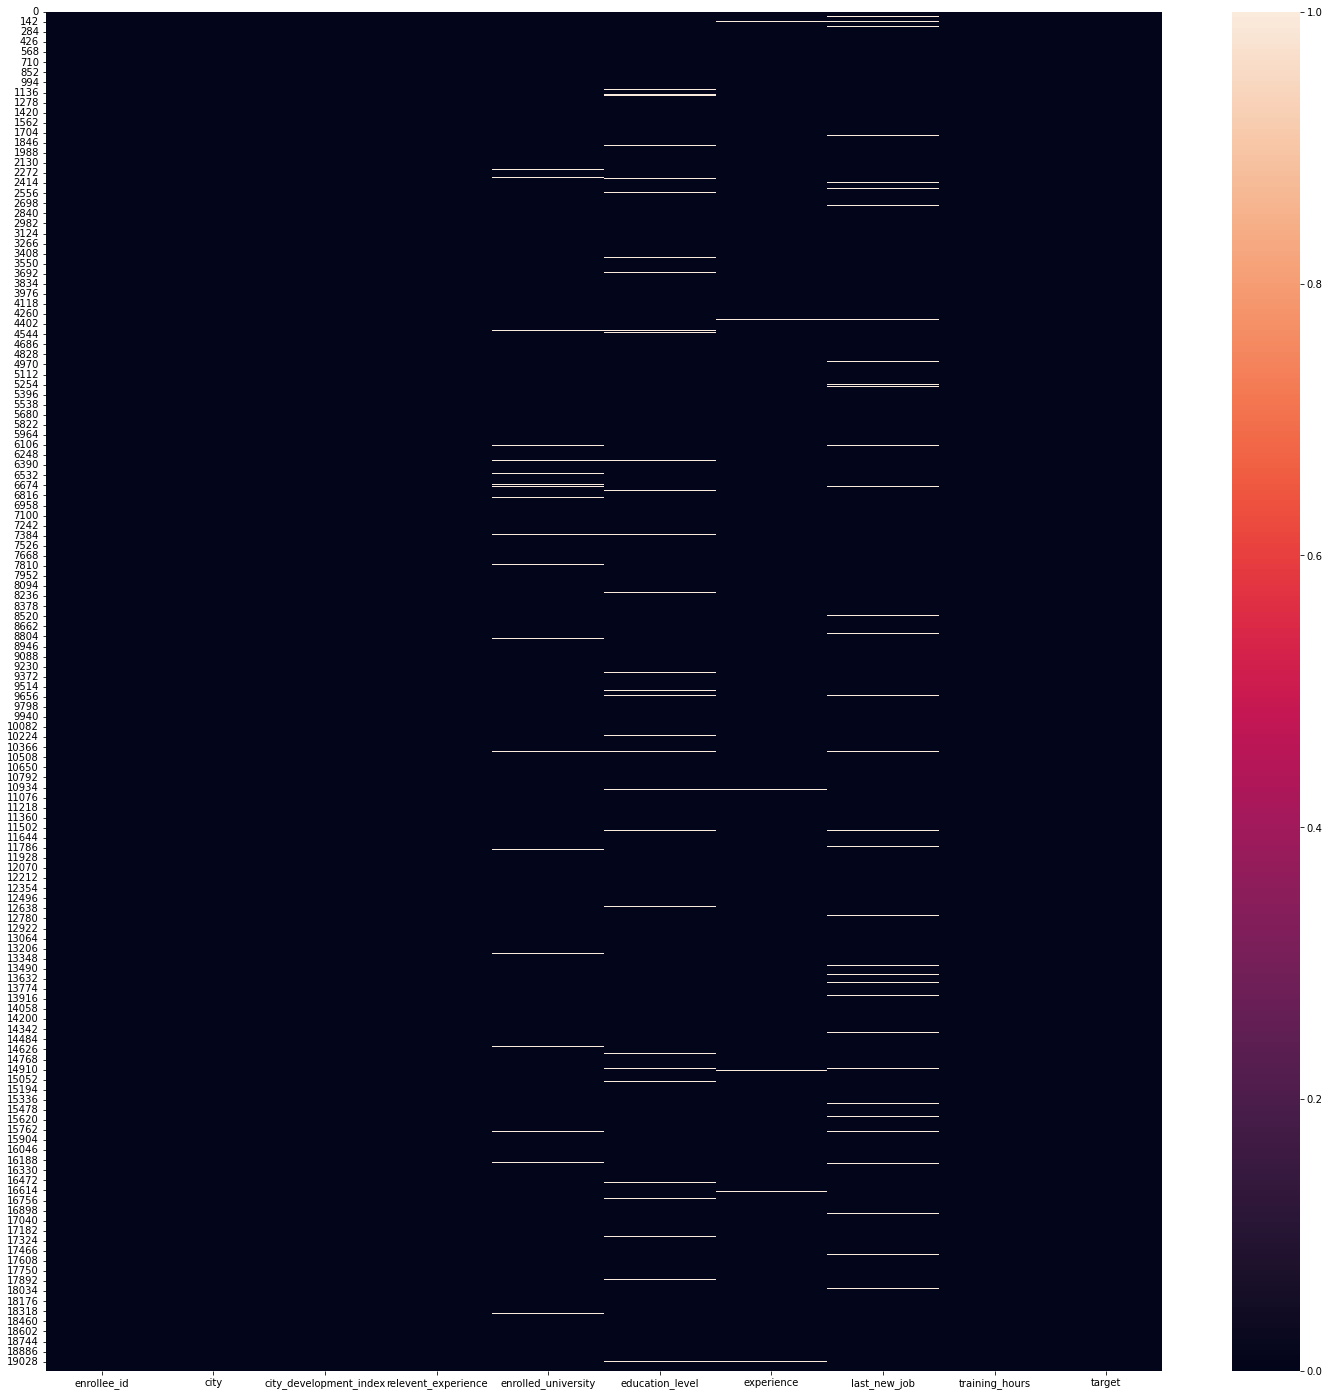

In [18]:
plt.figure(figsize=(25,25))
sns.heatmap(df3.isnull())

In [19]:
df4=df3.dropna()

In [21]:
df4.isnull().sum().sum()

0

<AxesSubplot:>

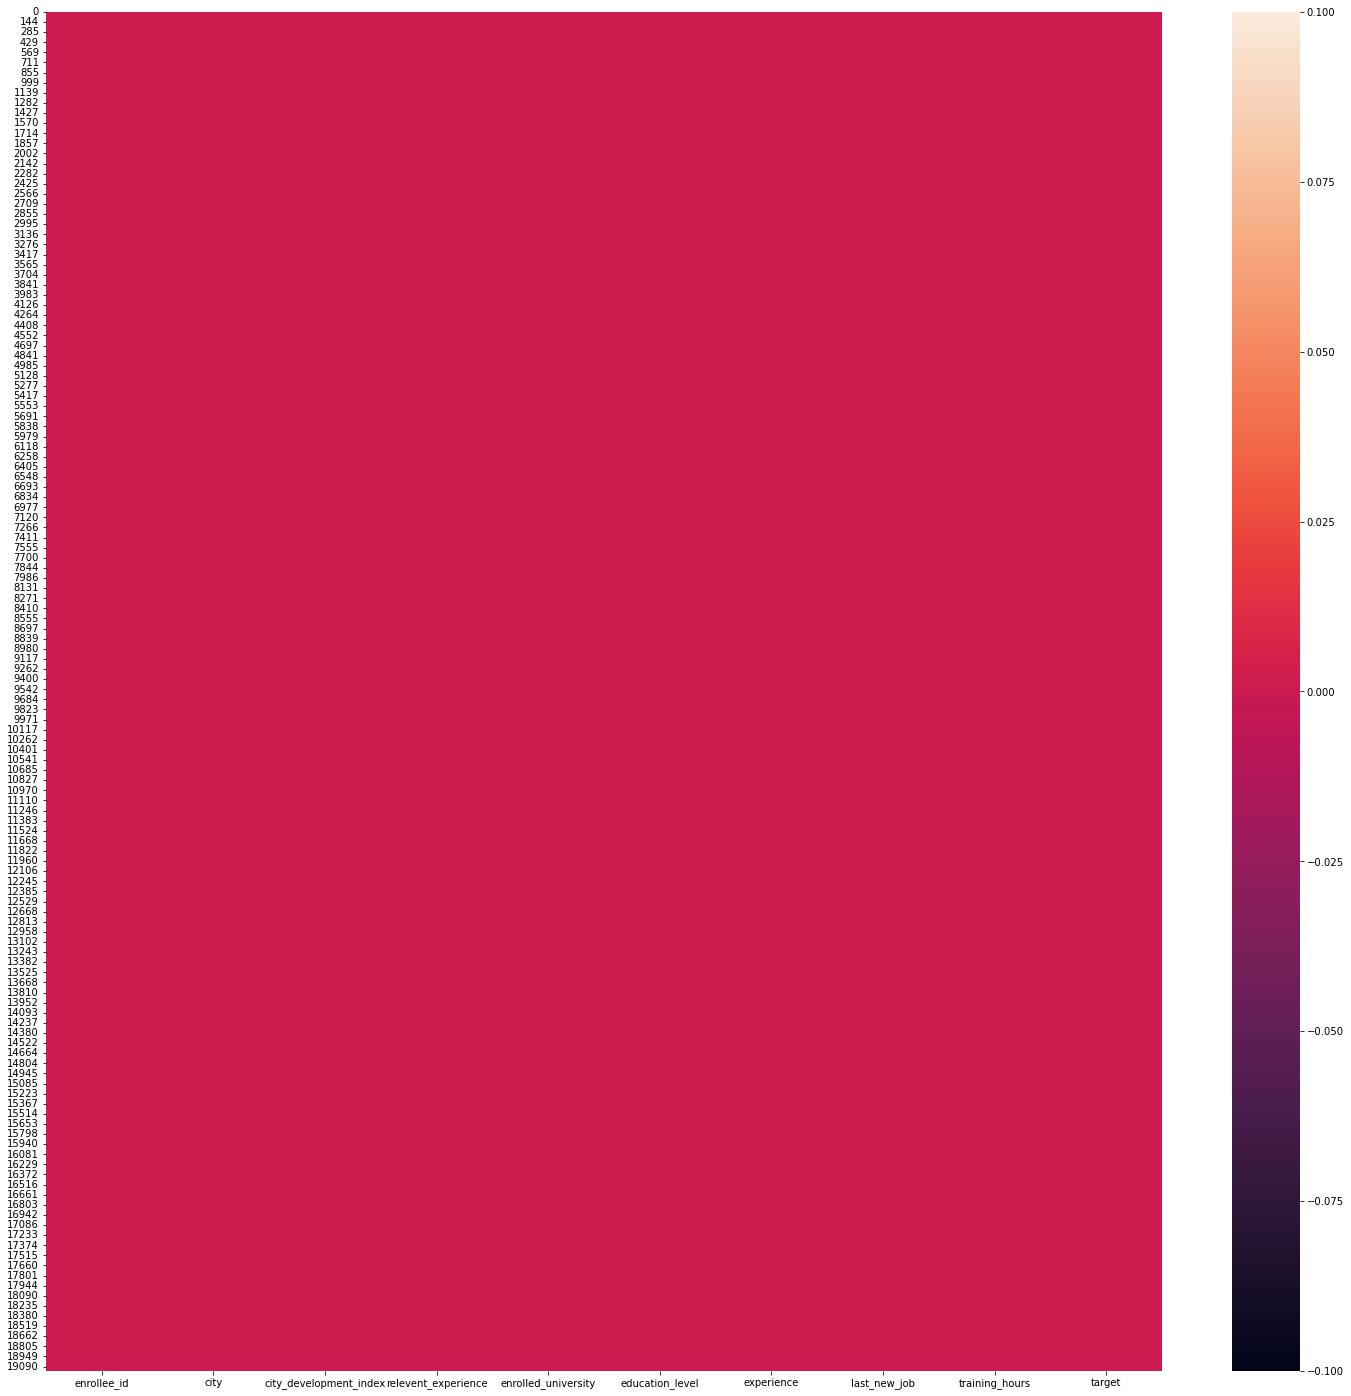

In [22]:
plt.figure(figsize=(25,25))
sns.heatmap(df4.isnull())

In [23]:
df4.select_dtypes(include=['int64','float64']).columns

Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

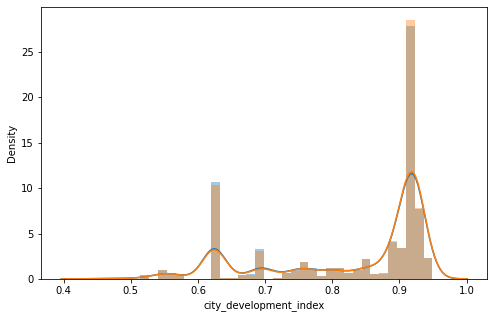

In [50]:
plt.figure(figsize=(8,5))
sns.distplot(df['city_development_index'])
sns.distplot(df4['city_development_index'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

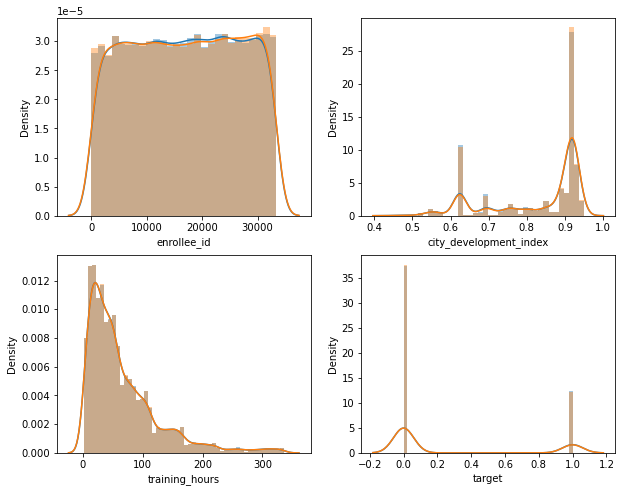

In [56]:
num_var=['enrollee_id', 'city_development_index', 'training_hours', 'target']
plt.figure(figsize=(10,8))
for i, var in enumerate(num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var])
    sns.distplot(df4[var])

In [37]:
df4.select_dtypes(include=['object']).columns

Index(['city', 'relevent_experience', 'enrolled_university', 'education_level',
       'experience', 'last_new_job'],
      dtype='object')

In [43]:
pd.concat([df['city'].value_counts()/df.shape[0]*100,
           df4['city'].value_counts()/df4.shape[0]*100],axis=1,keys=['city_org','city_clean'])

city_org  city_clean
city_103  22.732018   23.281892
city_21   14.103769   13.622738
city_16    8.001879    8.165871
city_114   6.973588    6.961252
city_160   4.410690    4.535361
...             ...         ...
city_129   0.015659    0.011102
city_111   0.015659    0.016654
city_121   0.015659    0.016654
city_140   0.005220    0.005551
city_171   0.005220    0.005551

[123 rows x 2 columns]

In [44]:
def cat_var_dist(var):
    return pd.concat([df[var].value_counts()/df.shape[0]*100,
           df4[var].value_counts()/df4.shape[0]*100],axis=1,keys=[var+'_org',var+'_clean'])

In [46]:
cat_var_dist('city')


city_org  city_clean
city_103  22.732018   23.281892
city_21   14.103769   13.622738
city_16    8.001879    8.165871
city_114   6.973588    6.961252
city_160   4.410690    4.535361
...             ...         ...
city_129   0.015659    0.011102
city_111   0.015659    0.016654
city_121   0.015659    0.016654
city_140   0.005220    0.005551
city_171   0.005220    0.005551

[123 rows x 2 columns]

In [47]:
cat_var_dist('relevent_experience')

relevent_experience_org  relevent_experience_clean
Has relevent experience                71.990813                  73.220828
No relevent experience                 28.009187                  26.779172